In [1]:
# Tensorflow Import 과정 + 버전 보여줌
import tensorflow as tf
print(tf.__version__)

2.2.0


In [4]:
#난수 생성
rand = tf.random.uniform([4],0,1)  # [균일분포] 행렬, 최소, 최댓값
print(rand)

rand = tf.random.normal([4],0,1)   # [정규분포] 행렬, 평균, 표준편차
print(rand)
# 평균 0, 표준편차 1 일때 정규분포를 [표준정규분포(standard normal distribution)]
# 라 한다.

tf.Tensor([0.47678137 0.03378248 0.57252276 0.87300587], shape=(4,), dtype=float32)
tf.Tensor([-0.77029395  0.201107   -0.55619377  0.8317663 ], shape=(4,), dtype=float32)


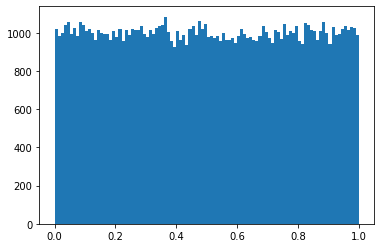

In [5]:
# 히스토그램 확인

import matplotlib.pyplot as plt
random_normal = tf.random.uniform([100000],0,1)
plt.hist(random_normal, bins=100)
plt.show()

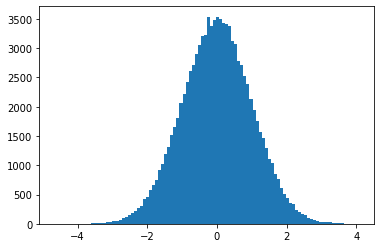

In [6]:
# 히스토그램 확인

import matplotlib.pyplot as plt
random_normal = tf.random.normal([100000],0,1)
plt.hist(random_normal, bins=100)
plt.show()

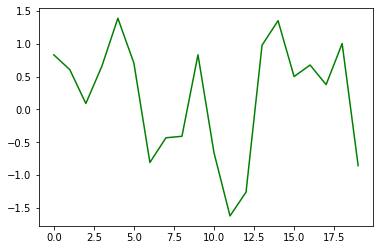

In [12]:
#matplotlib.pyplot을 이용한 시각화

import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y,'g-')  # blue 점(o)을 원하면 bo / 초록 선을 원하면 'g-' 
plt.show()

In [14]:
# 뉴런 만들기

# 뉴런이 모여서 "Layer(층)"이 되고 / Layer이 모여서 "신경망"이 된다.

# 처음에는 초기화를 통해 랜덤한 가중치(w)를 넣고, 학습과정에서 점차 일정한 값으로
# 수렴하게 된다. 이를 통해 가장 좋은 가중치(w)를 얻어내는것이 뉴런의 [학습]이다

# 활성화 함수
# 초창기엔 시그모이드 사용했지만, 오류를 역전파할 때 시그모이드 함수가 값을 작아지게 함
# 시그모이드는 출력값을 0~1 사이로만 제한하지만, ReLU는 양수를 그대로 반환하므로
# 값의 왜곡이 적기에 요즘엔 활성화 함수로 ReLU를 주로 사용한다
# ReLU = Rectified Linear Unit


# 시그모이드 구현
import math               # math 모듈은 exp의 계산을 위해 필요함
def sigmoid(x):
  return 1/(1+math.exp(-x))



# 입력을 1을 넣었을 때 출력으로 0을 뽑는 뉴런을 만들어보자!

x = 1                     # 입력
y = 0                     # 출력(기댓값)
w = tf.random.normal([1],0,1)  # 가중치 w는 정규분포로 설정
output = sigmoid(x*w)          # 이를 통해 나오는 결과값과 y(기대값)의 차이가 error다
print(output)                  # 이 error를 줄여가는게 바로 학습과정이다


0.18746979804323574


In [15]:
# 이때 w값을 변화시키기 위해 경사하강법(Gradient Descent)를 사용한다.
# 경사하강법은 w에 입력과 학습률(a)과 에러를 곱한값을 더해주는 것이다
# 경사하강법 : w = w + x(입력) * a(학습률) * error

# 이때 학습률 a는 w를 업데이트하는 정도로, 큰 값으로 설정하면 학습이 빨리되지만
# 과도한 학습으로 적정한 수치를 벗어날 우려가 있고, 
# 너무 작은값으로 설정하면 학습 속도가 너무 느려질 수 있습니다.


#경사하강법 구현
a = 0.1                 # 학습률 = 0.1이라 가정합니다.
for i in range(1000) :
  output = sigmoid(x*w)
  error = y - output
  w = w + x * a * error

  if i % 100 == 99:
    print("{}번째           에러는 : {}               결과값은 : {} ".format(i,error,output))

99번째           에러는 : -0.07056331757800896               결과값은 : 0.07056331757800896 
199번째           에러는 : -0.042274338787883704               결과값은 : 0.042274338787883704 
299번째           에러는 : -0.030014765039310776               결과값은 : 0.030014765039310776 
399번째           에러는 : -0.023220106127638734               결과값은 : 0.023220106127638734 
499번째           에러는 : -0.018915399648947378               결과값은 : 0.018915399648947378 
599번째           에러는 : -0.015948476807171128               결과값은 : 0.015948476807171128 
699번째           에러는 : -0.013781501244581931               결과값은 : 0.013781501244581931 
799번째           에러는 : -0.012130319324470501               결과값은 : 0.012130319324470501 
899번째           에러는 : -0.010830809583045794               결과값은 : 0.010830809583045794 
999번째           에러는 : -0.00978174657890899               결과값은 : 0.00978174657890899 


In [16]:
# 입력을 0으로 넣었을때 출력으로 1을 뽑는 뉴런을 만들어보자!

x = 0
y = 1
w = tf.random.normal([1], 0,1)

for i in range(1000):
  output = sigmoid(x*w)
  error = y - output
  w = w + x*error*0.1

  if i%100 == 99:
    print(i,error,output)


# 결과값은 변하지 않는다
# x = 0 이 들어가 곱해져서 학습이 되지 않는다
# 이렇게 입력으로 0을 받았을 때 뉴런이 아무것도 배우지 못하는 상황을 방지하기 위해
# 편항 b 이라는 것을 뉴런에 넣어준다

99 0.5 0.5
199 0.5 0.5
299 0.5 0.5
399 0.5 0.5
499 0.5 0.5
599 0.5 0.5
699 0.5 0.5
799 0.5 0.5
899 0.5 0.5
999 0.5 0.5


In [17]:
# 편향 b를 넣어주게 된다면

x = 0
y = 1
w = tf.random.normal([1],0,1)
b = tf.random.normal([1],0,1)     # 편향도 random하게 넣어줌

for i in range(1000):
  output = sigmoid(x*w+b)
  error = y - output
  w = w + x*error*0.1
  b = b + 1*error*0.1           # 편향도 최적의 값으로 학습을 해준다 / 편향은 x가 아닌 1을 넣어준다

  if i%100 == 99:
    print("{}번째           에러는 : {}               결과값은 : {} ".format(i,error,output))


99번째           에러는 : 0.07365464735168537               결과값은 : 0.9263453526483146 
199번째           에러는 : 0.043398519563669136               결과값은 : 0.9566014804363309 
299번째           에러는 : 0.030584297477325606               결과값은 : 0.9694157025226744 
399번째           에러는 : 0.023561867102349754               결과값은 : 0.9764381328976502 
499번째           에러는 : 0.019142556507944608               결과값은 : 0.9808574434920554 
599번째           에러는 : 0.016110143710280633               결과값은 : 0.9838898562897194 
699번째           에러는 : 0.013902280880089268               결과값은 : 0.9860977191199107 
799번째           에러는 : 0.012223915582272316               결과값은 : 0.9877760844177277 
899번째           에러는 : 0.010905479922257655               결과값은 : 0.9890945200777423 
999번째           에러는 : 0.00984267387405735               결과값은 : 0.9901573261259426 


In [22]:
# 입력의 수를 4배로 늘려봤다 (AND 게이트 구현)

import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[1],[0],[0],[0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1    # 편향의 입력 1

for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b_x*b)
    error = y[j][0] - output
    w = w + x[j]*error*0.1
    b = b + b_x*error*0.1
    error_sum += error

  if i%100 == 99:
    print("{}번째           에러의 합은 : {} ".format(i,error_sum))       # 에러의 합인 에러썸을 사용

99번째           에러의 합은 : -0.1683292942660801 
199번째           에러의 합은 : -0.10966723424603904 
299번째           에러의 합은 : -0.08198090632922019 
399번째           에러의 합은 : -0.06547801529690059 
499번째           에러의 합은 : -0.05445377976326647 
599번째           에러의 합은 : -0.04655978704072066 
699번째           에러의 합은 : -0.04063193911002752 
799번째           에러의 합은 : -0.0360193910390009 
899번째           에러의 합은 : -0.03233076945740256 
999번째           에러의 합은 : -0.029316308021938076 
1099번째           에러의 합은 : -0.02680757502793683 
1199번째           에러의 합은 : -0.024687963649841882 
1299번째           에러의 합은 : -0.02287546949948693 
1399번째           에러의 합은 : -0.02130626019452725 
1499번째           에러의 합은 : -0.019936309737282235 
1599번째           에러의 합은 : -0.01872974055032951 
1699번째           에러의 합은 : -0.017658799848533684 
1799번째           에러의 합은 : -0.01670180669288406 
1899번째           에러의 합은 : -0.01584329645891721 
1999번째           에러의 합은 : -0.015065856984878894 


In [19]:
# AND 게이트의 출력값

for i in range(4):
  print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

# 마지막 [0 0]일때 Output은 자세히보면 e-05가 달려있다.
# 0.00002322..로 사실상 0과 같다

X: [1 1] Y: [1] Output: 0.9648046701722204
X: [1 0] Y: [0] Output: 0.02494017276666927
X: [0 1] Y: [0] Output: 0.025016749809891815
X: [0 0] Y: [0] Output: 2.3940717905876762e-05


In [23]:
# 비슷하게 OR 게이트 구현

import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[1],[1],[1],[0]])           # 결과값만 바꿔주면 된다
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1    # 편향의 입력 1

for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b_x*b)
    error = y[j][0] - output
    w = w + x[j]*error*0.1
    b = b + b_x*error*0.1
    error_sum += error

  if i%100 == 99:
    print("{}번째           에러의 합은 : {} ".format(i,error_sum))       # 에러의 합인 에러썸을 사용

99번째           에러의 합은 : -0.11062428835758181 
199번째           에러의 합은 : -0.054660669377798204 
299번째           에러의 합은 : -0.036345297182359265 
399번째           에러의 합은 : -0.027182427492155437 
499번째           에러의 합은 : -0.021666567158254463 
599번째           에러의 합은 : -0.017984987330132138 
699번째           에러의 합은 : -0.01535702823618268 
799번째           에러의 합은 : -0.013389284444129193 
899번째           에러의 합은 : -0.01186242703956391 
999번째           에러의 합은 : -0.010643917691134284 
1099번째           에러의 합은 : -0.009649429227194375 
1199번째           에러의 합은 : -0.008822914424436279 
1299번째           에러의 합은 : -0.00812556625770313 
1399번째           에러의 합은 : -0.007529167579658595 
1499번째           에러의 합은 : -0.007013808472963651 
1599번째           에러의 합은 : -0.006563405175379844 
1699번째           에러의 합은 : -0.006166773638607889 
1799번째           에러의 합은 : -0.005815509364494775 
1899번째           에러의 합은 : -0.005501113035392132 
1999번째           에러의 합은 : -0.005218448939063727 


In [ ]:
# OR 게이트의 출력값

for i in range(4):
  print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

In [24]:
# 비슷하게 XOR 게이트 구현

import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0],[1],[1],[0]])           # 결과값만 바꿔주면 된다
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1    # 편향의 입력 1

for i in range(2000):
  error_sum = 0e-09 
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b_x*b)
    error = y[j][0] - output
    w = w + x[j]*error*0.1
    b = b + b_x*error*0.1
    error_sum += error

  if i%100 == 99:
    print("{}번째           에러의 합은 : {} ".format(i,error_sum))        # 에러의 합인 에러썸을 사용

99번째           에러의 합은 : -0.015543085796232314 
199번째           에러의 합은 : -0.0031384955933416725 
299번째           에러의 합은 : -0.0006328757287556996 
399번째           에러의 합은 : -0.00012759177399490618 
499번째           에러의 합은 : -2.573029944186178e-05 
599번째           에러의 합은 : -5.182191243346956e-06 
699번째           에러의 합은 : -1.0442570214097557e-06 
799번째           에러의 합은 : -2.2988549519542545e-07 
899번째           에러의 합은 : -6.514973449611716e-09 
999번째           에러의 합은 : 3.722842145670313e-09 
1099번째           에러의 합은 : 3.722842145670313e-09 
1199번째           에러의 합은 : 3.722842145670313e-09 
1299번째           에러의 합은 : 3.722842145670313e-09 
1399번째           에러의 합은 : 3.722842145670313e-09 
1499번째           에러의 합은 : 3.722842145670313e-09 
1599번째           에러의 합은 : 3.722842145670313e-09 
1699번째           에러의 합은 : 3.722842145670313e-09 
1799번째           에러의 합은 : 3.722842145670313e-09 
1899번째           에러의 합은 : 3.722842145670313e-09 
1999번째           에러의 합은 : 3.722842145670313e-09 


In [25]:
# XOR 게이트의 출력값

for i in range(4):
  print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

# 결과값이 0.5로 수렴하게 나오며 쓰레기값이 나온다
# 이게 바로 첫번째 인공지능의 겨울을 불러온 XOR 문제
# 이러한 문제는 여러 개의 퍼셉트론을 사용하면 해결된다

X: [1 1] Y: [0] Output: 0.5128176286712095
X: [1 0] Y: [1] Output: 0.5128176305326305
X: [0 1] Y: [1] Output: 0.4999999990686774
X: [0 0] Y: [0] Output: 0.5000000009313226


In [26]:
# tf.keras를 사용해서 여러 개의 퍼셉트론을 생성해보자

import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0],[1],[1],[0]])          


# tf.keras에서 model은 앞으로도 자주 쓰일거다
# Dense Layer : 가장 기본적인 레이어로서, 레이어의 입력과 출력 사이에 있는 모든 뉴런이 서로 연결되는 레이어입니다.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),    # 자세한 설명은 교재 63p
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Optimizer : 최적화함수 = 딥러닝의 학습식을 정의
# SGD : Stochastic Gradient Descent (확률적 경사 하강법)
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')   

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [27]:
# 실제 네트워크를 학습시켜보자

history = model.fit(x,y, epochs=500, batch_size=1)

#epochs 만큼 반복해서 학습시킨다
#결과는 책에 나와있듯이 XOR 게이트 구현을 성공시킨다

Epoch 1/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2868
Epoch 2/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2828
Epoch 3/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2793
Epoch 4/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2763
Epoch 5/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2736
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2710
Epoch 7/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2688
Epoch 8/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2666
Epoch 9/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2650
Epoch 10/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2634
Epoch 11/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2624
Epoch 12/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2612
Epoch 13/500
4/4 [==============================] - 0s 1ms/st

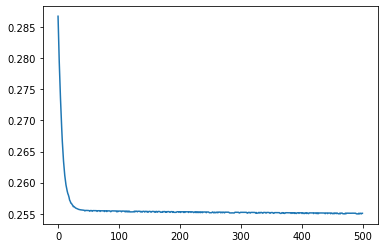

In [28]:
# 아까 XOR게이트의 loss를 그래프로 그려보자

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])